In [4]:
from ase.geometry.analysis import Analysis
from utils import readStructs

In [16]:
data = readStructs("../sirich.nhpoor.fads/", shallow = False, name = 'output')
data['analysis'] = [Analysis(i) for i in data['geom']]
data

,geom,analysis
2-13,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...
5-7,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...
6-6,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...
7-8,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...
0-4,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...
...,...,...
9-7,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...
1-3,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...
0-8,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...
3-13,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...


In [17]:
data['sifbonds'] = [i.get_bonds("Si","F") for i in data['analysis']]
data['ffbonds'] = [i.get_bonds("F","F") for i in data['analysis']]

In [18]:
from structure import getslab
data['slabs'] = [getslab(i) for i in data['geom']]

In [20]:
data

,geom,analysis,sifbonds,ffbonds,slabs
2-13,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,[[]],[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339..."
5-7,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(286, 362)]]","[[(348, 351)]]","(Atom('H', [6.141052145, 11.22574118, 1.215339..."
6-6,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(299, 355)]]",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339..."
7-8,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(241, 356), (263, 366), (285, 352), (286, 36...",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339..."
0-4,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,[[]],[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339..."
...,...,...,...,...,...
9-7,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(301, 366)]]","[[(349, 352)]]","(Atom('H', [6.141052145, 11.22574118, 1.215339..."
1-3,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(275, 356), (277, 349), (289, 366), (301, 35...",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339..."
0-8,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,[[]],[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339..."
3-13,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(262, 364), (293, 362)]]",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339..."


In [80]:
view(gen.read_gen("../sirich.nhpoor.fads/input0-0.gen"))

In [81]:
from ase.visualize import view
view(data['geom'])

In [48]:
from ase.formula import Formula
import numpy as np
data['slabFratio'] = [
    np.sum([i.symbol == "F" for i in data['slabs'][i]])/np.sum([i.symbol == "F" for i in data['geom'][i]])
    for i in data.index
]
data

,geom,analysis,sifbonds,ffbonds,slabs,slabFratio
2-13,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,[[]],[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.00
5-7,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(286, 362)]]","[[(348, 351)]]","(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.05
6-6,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(299, 355)]]",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.10
7-8,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(241, 356), (263, 366), (285, 352), (286, 36...",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.30
0-4,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,[[]],[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.00
...,...,...,...,...,...,...
9-7,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(301, 366)]]","[[(349, 352)]]","(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.05
1-3,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(275, 356), (277, 349), (289, 366), (301, 35...",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.25
0-8,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,[[]],[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.00
3-13,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(262, 364), (293, 362)]]",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.10


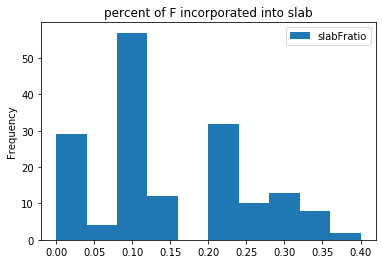

In [54]:
%matplotlib inline
data.plot(kind = 'hist', y = 'slabFratio', title = 'percent of F incorporated into slab')

In [60]:
for i in data.index:
    print(len(data['ffbonds'][i][0]))

0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0


In [65]:
data['isolatedFatoms'] =  [
    np.sum([i.symbol == "F" for i in data['geom'][i]])
    - len(data['ffbonds'][i]) - np.sum([i.symbol == "F" for i in data['slabs'][i]])
    for i in data.index
]

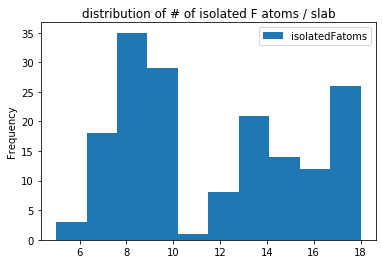

In [66]:
data.plot(kind = 'hist', y = 'isolatedFatoms', title = "distribution of # of isolated F atoms / slab")

In [63]:
data

,geom,analysis,sifbonds,ffbonds,slabs,slabFratio,isolatedFatoms
2-13,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,[[]],[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.00,9
5-7,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(286, 362)]]","[[(348, 351)]]","(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.05,18
6-6,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(299, 355)]]",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.10,8
7-8,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(241, 356), (263, 366), (285, 352), (286, 36...",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.30,13
0-4,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,[[]],[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.00,9
...,...,...,...,...,...,...,...
9-7,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(301, 366)]]","[[(349, 352)]]","(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.05,18
1-3,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(275, 356), (277, 349), (289, 366), (301, 35...",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.25,14
0-8,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,[[]],[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.00,9
3-13,"(Atom('H', [6.141052145, 11.22574118, 1.215339...",<ase.geometry.analysis.Analysis object at 0x7f...,"[[(262, 364), (293, 362)]]",[[]],"(Atom('H', [6.141052145, 11.22574118, 1.215339...",0.10,17


In [73]:
data.to_pickle("../sirich.nhpoor.fads/data.pkl")

In [93]:
from ase.io import vasp
vasprun = [i for i in vasp.read_vasp_xml("../vasprun.xml", index = slice(0, -1))]
vasprun

[Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645034, 0.0, 0.0], [-3.83322506, 6.63934056, 0.0], [0.0, 0.0, 43.858854]], constraint=FixAtoms(indices=[115, 116, 117, 118, 119, 120]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645034, 0.0, 0.0], [-3.83322506, 6.63934056, 0.0], [0.0, 0.0, 43.858854]], constraint=FixAtoms(indices=[115, 116, 117, 118, 119, 120]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645034, 0.0, 0.0], [-3.83322506, 6.63934056, 0.0], [0.0, 0.0, 43.858854]], constraint=FixAtoms(indices=[115, 116, 117, 118, 119, 120]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645034, 0.0, 0.0], [-3.83322506, 6.63934056, 0.0], [0.0, 0.0, 43.858854]], constraint=FixAtoms(indices=[115, 116, 117, 118, 119, 120]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645034, 0.0, 0.0], [-3.8

In [86]:
xdat = vasp.read_vasp_xdatcar("../XDATCAR", index = slice(0, -1))
xdat

[Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645, 0.0, 0.0], [-3.833225, 6.639341, 0.0], [0.0, 0.0, 43.858854]]),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645, 0.0, 0.0], [-3.833225, 6.639341, 0.0], [0.0, 0.0, 43.858854]]),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645, 0.0, 0.0], [-3.833225, 6.639341, 0.0], [0.0, 0.0, 43.858854]]),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645, 0.0, 0.0], [-3.833225, 6.639341, 0.0], [0.0, 0.0, 43.858854]]),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645, 0.0, 0.0], [-3.833225, 6.639341, 0.0], [0.0, 0.0, 43.858854]]),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645, 0.0, 0.0], [-3.833225, 6.639341, 0.0], [0.0, 0.0, 43.858854]]),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645, 0.0, 0.0], [-3.833225, 6.639341, 0.0], [0.0, 0.0, 43.858854]]),
 Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.66645, 0.0, 0.0], [-3.833225, 6.639341, 0.0], [0.0, 0.0, 43.858854]]),
 Atoms(symbols='H15ArN67Si48', p

In [90]:
out = vasp.read_vasp_out("../OUTCAR", index = slice (0,-1))
out

[Atoms(symbols='H15ArN67Si48', pbc=True, cell=[[7.666450336, 0.0, 0.0], [-3.833225058, 6.639340558, 0.0], [0.0, 0.0, 43.858854]], constraint=FixAtoms(indices=[0, 1, 2, 24, 25, 26, 27]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, constraint=FixAtoms(indices=[0, 1, 2, 24, 25, 26, 27]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, constraint=FixAtoms(indices=[0, 1, 2, 24, 25, 26, 27]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, constraint=FixAtoms(indices=[0, 1, 2, 24, 25, 26, 27]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, constraint=FixAtoms(indices=[0, 1, 2, 24, 25, 26, 27]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, constraint=FixAtoms(indices=[0, 1, 2, 24, 25, 26, 27]), calculator=SinglePointDFTCalculator(...)),
 Atoms(symbols='H15ArN67Si48', pbc=True, constraint=FixAtoms(indices=[0

In [98]:
natoms = len(out[0])
print(natoms)
allVelos = []
with open("../VDATCAR") as f:
    count = 0
    for i, line in enumerate(f):
        velos = []
        if count < natoms
            velos += [line]
            count += 1
        else:
            allVelos += [velos]
            
        
        

131


2*E(kin)/ (degrees of freedom)

In [104]:
velos = pd.read_clipboard(header = None)
velos = velos.to_numpy()
velos

array([[-3.15466751e-03, -2.66237574e-03,  1.13155843e-04],
       [-7.01173517e-04,  2.91573299e-03, -8.89457559e-04],
       [ 2.85977751e-03, -1.24746578e-03, -3.87273681e-04],
       [ 1.85903746e-03, -3.40611472e-03, -3.12494335e-03],
       [ 1.94570668e-03,  2.94647314e-03, -3.40169272e-03],
       [-4.08836446e-03, -2.23214644e-04, -2.88328106e-03],
       [ 1.62498074e-03,  5.73732013e-03,  4.32667595e-03],
       [ 3.05833857e-03, -5.59278168e-03,  3.40564001e-03],
       [-6.37626313e-03, -2.07373177e-03,  3.21309964e-03],
       [ 2.44943077e-05, -1.05120686e-03,  1.67102234e-03],
       [-6.73497632e-05, -2.63913805e-04,  1.33681787e-03],
       [ 5.99133068e-05,  8.39876637e-05,  7.98669731e-04],
       [-7.66779163e-03, -5.01476065e-03,  6.70558019e-03],
       [-2.82048696e-04,  6.64252788e-03,  5.83805206e-03],
       [ 4.69416733e-03, -5.65844476e-03,  5.30341263e-03],
       [-3.67755773e-03, -1.81645730e-03,  1.93022816e-03],
       [ 2.65144173e-03, -4.06885374e-03

In [144]:
print(dof)
len(velos) * 3 - 3 * 6

375


375

In [138]:
masses = [atom.mass for atom in out[0]]
kb = 8.617333262145E-5 #ev/K
KE = 0
dof = len(out[0]) * 3 - 6*3   #natoms * 3 - 6 (fixed atoms) * 3
for i, v in enumerate(velos):
    vx, vy, vz = v
#     m = masses[i] * 1.66053907E-27 # convert amu to kg
    m = masses[i]
#     v = np.sqrt(vx**2 + vy**2  + vz**2) * 1E6 # convert Å/fs to m/s
    v = np.sqrt(vx**2 + vy**2  + vz**2) 
    KE += 1/2 * m * v**2
KE *= 103.642697 # amu * Å^2/fs^2 to eV conversion
print("energy in eV: {}".format(KE))

    

energy in eV: 25.76051933810035


In [139]:
2 * KE/kb / dof

1594.3382052241761